In [2]:
# data preparation

import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                        21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                        23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                        27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                        39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
                        44.0])

In [3]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

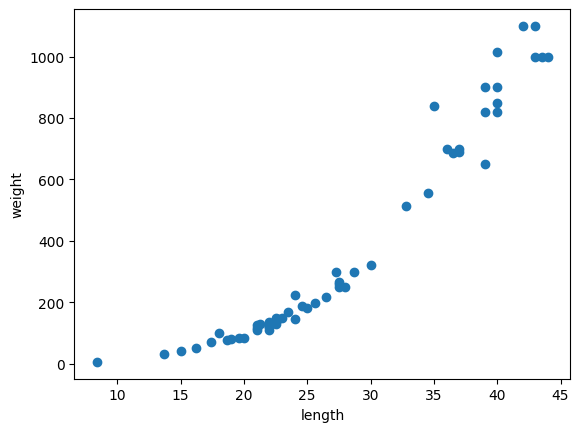

In [4]:
# Draw a scatter plot

import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [23]:
# Divide the given data into training sets and test sets

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [24]:
# numpy package provides a method to change array size

test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [25]:
test_array = test_array.reshape(2, 2)       # change 2 X 2 size
print(test_array.shape)

(2, 2)


In [27]:
train_input = train_input.reshape(-1, 1)
test_input  = test_input.reshape(-1, 1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [21]:
# Implement K-Nearest neighbors regression

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)    # initiate training

KNeighborsRegressor()

In [29]:
# Check the score from the test set

print(knr.score(test_input, test_target))

# coefficient of determination
# R² = 1 - Σ(target - expectation)² / Σ(target - average)²

0.992809406101064


In [32]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

# MAE: Mean Absolute Error
mae = mean_absolute_error(test_target, test_prediction)

# How much is there an error in general according to this model?
print(mae)

19.157142857142862


In [35]:
print(knr.score(train_input, train_target))     # underfitting detected

0.9698823289099254


In [38]:
# increase complexity

knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))

0.9746459963987609


We've detected underfitting phenomenon according to line `[35]`, so we increased the complexity of the model by increasing `knr.n_neighbors`(_k value_).

As a result, we could increase the accuracy from `0.9698823289099254` to `0.9746459963987609`, refer to the line `[35]` and `[38]`.